# waves

In [1]:
#import math
from scipy import io
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import scipy.integrate
import pandas as pd
from IPython.display import display
import time
import matplotlib.colors as colors
import random
import pandas as pd
import glob
import os

**main variables**
<br> f - main frequency (Hz)
<br> full_f - the entire time-frequency function (Hz) ("x" as x axis)
<br> frangemax - x axis length of Fourier-transform, note, that this does not affect Fourier calculation
<br> samples - sample points of the first graph
<br> s_rate - sample rate (Hz)
<br> amp - amplitude of signal
<br> randamp - amplitude of noise (random noise)
<br> <br> First, we create our signal and noise. In deafult: a sine wave, and a white noise.
<br> Or import one in.

In [2]:
%%script false
f=40
#t=4
samples=20000 #random.randint(400,50000)
s_rate=4000
t=samples/s_rate
randamp=4
nyquist=samples/2/t
frangemax=200#nyquist

xf=np.linspace(0.0, frangemax, int(frangemax*t+1))
x = np.linspace(0.0, t, samples)
full_f=(f-60/((x/1.5)+1.8))*7-30  #np.linspace(f, f, samples) #      f+x*0.01     15+10*np.sin(np.pi*x)#   
full_f_phase = np.zeros(samples)
for i in range (samples):
    full_f_phase[i]=np.sum(full_f[:i])*2/s_rate
    
amp=3*abs(np.sin(2*np.pi*x))#0.4+x/t*0.6

s_det = amp*np.sin(full_f_phase*np.pi) #Changing freqency. old way: *(1+(x*10**2)**0.5)
s_noise = (np.random.rand(samples)-0.5)*randamp
s=(s_det+s_noise)#+200000#/(0.5*randamp+amp.max())*amp.max()
print (samples)
#f1=f; f2=f/np.sqrt(2); s=np.sin(f1*2*np.pi*x)+np.sin(f2*2*np.pi*x)

Couldn't find program: 'false'


In [3]:
#%%script false
path ='C:\\Users\\Marci\\Documents\\transientwaves\\imputdata\\in\\'#pc
#path ='C:\\Users\\win10\\Downloads\\transient-waves\\inputdata\\in\\'#laptop

for filename in glob.glob(os.path.join(path, '*.sav')):
    sav1 = io.readsav(filename, python_dict = True)
    print('Loaded: '+filename)
    print('\n')

Loaded: C:\Users\Marci\Documents\transientwaves\imputdata\in\AUGD_32342_0-35.sav




In [7]:
#%%script false

shot_i=0
#print(sav1)
s=np.array(sav1['data'])#[shot_i]
x=np.array(sav1['timeax'])
#print("\n", sav1['channels'])
print("\n", s)
#print("\n", sav1['channels'][shot_i])
sxr_name=str(sav1['channels'][shot_i])[2:4]+'R'+str(sav1['channels'][shot_i])[5:-1]
shot=os.path.basename(filename)[:4]+' '+os.path.basename(filename)[5:10]+', '+sxr_name#str(sav1['channels'][shot_i])[2:-1]
print("\n",shot)


#C:\\Users\\win10\\Downloads\\transient-waves\\inputdata\\AUGD_34924_2208_2238_Loaded-with-MTR.sav - nullközepű 
#AUGD_34924_J051_240_245_Loaded-with-MTR.sav - nem nullközepű SXR
#AUGD_28881_Loaded-with-MTR.sav - toroidális mágneses tekercs AUGD_28881_Loaded-with-MTR.sav
#C:\\Users\\Marci\\Documents\\transientwaves\\imputdata\\AUGD_34924_2208_2238_Loaded-with-MTR.sav


 [-0.15894836 -0.24100251 -9.26663    ... -0.97946584 -1.1640776
 -1.061512  ]

 AUGD 32342, MHR-B31-14


In [69]:
#%%script false
min_t=1.9
max_t=2.2

s = s.astype(float)
x = x.astype(float)
samples=s.size
full_f = np.zeros(samples)
t=max(x)-min(x)
nyquist=samples/2/t
frangemax=nyquist#250000#
xf=np.linspace(0.0, frangemax, frangemax*t+1)
s_rate=x.size/t

t=max_t-min_t
min_x=int(s_rate*min_t)
max_x=int(s_rate*max_t)
samples=max_x-min_x

x=x[min_x:max_x]
s=s[min_x:max_x]

print(max_t)
print(nyquist)
print(x.size)

2.2
1000000.1428571428
600000


C:\Users\Marci\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


The widget below controls the wisible range of the chart under it. Note that this is only for visualisation, the program calculates with the whole 0 - t range. The zooming is exponential. Value 0 displays the whole range.

In [57]:
#%%script false
usewidgets=1
import ipywidgets as widgets
view=widgets.FloatSlider()
if usewidgets==1:
    display(view)
else:
    view.value=0

FloatSlider(value=0.0)

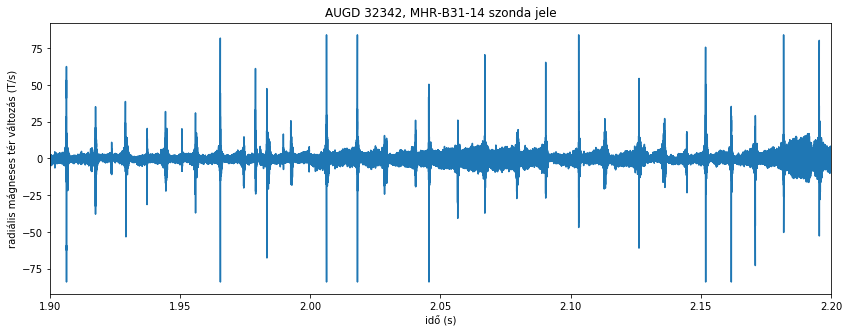

0.0


In [72]:
#%%script false
plt.figure(figsize=(14,5))
plt.title(shot+' szonda jele')
plt.plot(x,s)
#yaxismax=1/2**(view.value/12)
plt.xlim(min_t,max_t-(max_t-min_t)*view.value/100.6)
plt.ylabel('radiális mágneses tér változás (T/s)')
plt.xlabel('idő (s)')
#plt.savefig(shot+' in.pdf')
plt.show()

#plt.figure(figsize=(9,3.5))
#plt.title('Bemenő teszt csörp jel')
#plt.plot(x,s)
#yaxismax=1/2**(view.value/12)
#plt.axis([2.20,2.3,min(s),max(s)])
#plt.ylabel('Amplitúdó')
#plt.xlabel('idő (s)')
#plt.savefig(shot+' s_in_z.pdf')
#plt.show()

#plt.figure(figsize=(9,3.5))
#plt.title("A bemenő jel frekvenciája")
#plt.plot(x,full_f)
#yaxismax=1/2**(view.value/12)
#plt.xlim(-0.01,t/(1.05**view.value))
#plt.ylabel('Frekvencia (Hz)')
#plt.xlabel('idő (s)')
#plt.grid(True)
#plt.savefig('freq_in.pdf')
#plt.show()

print(full_f[-1])

## Fourier transform and examining it
<br>Now we take the Fourier-transform of the signal abowe, what has been already calculated, and make 3 plots:
 - One displaying the Real and imaginery parts of the vectors generated by Fourier at the corresponding frequencies
 - Next displaying their absolute values - we wil use these absolute values in the future
 - And one displaying the rotation of these vectors on the imaginary plane

In [73]:
%%script false
yf = scipy.fftpack.fft(s)
yfabs=np.abs(yf[:xf.size])
yfang=np.angle(yf[:xf.size])
yfimag=np.imag(yf[:xf.size])
yfreal=np.real(yf[:xf.size])
#yfabs=(np.abs(yf[:frangemax])*np.abs(yfimag)*np.abs(yfreal))

plt.figure(figsize=(9,3.5))
plt.plot(xf,yfimag,xf,yfreal)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('Frekvencia (Hz)')
plt.ylabel('Fourier amplitúdó')
plt.title('Fourier-transzformáció (Teszt jel)')
plt.grid(True)
plt.legend(('Valós rész', 'Képzetes rész'))
plt.savefig('t_fft1.pdf')
plt.show()

plt.figure(figsize=(9,3.5))
plt.plot(xf,yfabs,".-")
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('Frekvencia (Hz)')
plt.ylabel('Fourier amplitúdó')
#plt.xscale('log')
plt.yscale('log')
plt.title('Fourier-transzformáció abszolút értéke (Teszt jel)')
plt.grid(True)
plt.savefig('t_fft2.pdf')
plt.show()

yfang=yfang/np.pi
plt.figure(figsize=(13,5))
plt.plot(xf/1000,yfang,".-")
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax/1000))
plt.xlabel('frequency (kHz)') 
plt.ylabel("Fourier phase (pi)")
#plt.xscale('log')
plt.title('Fourier-transform phase')
plt.grid(True)
plt.show()

#print(yfang[f*int(t)+1])
#print(yfang[f*int(t)])
#print(yfang[f*int(t)-1])

Couldn't find program: 'false'


Now, we will seek the peaks of the 2nd graph: we will search for the most likely original frequencies. We will find the 5 biggest values, and display their Fourier (absolute) values.

In [74]:
%%script false
#print (np.average(np.abs(yf)))
#print (yfabs)
yfsort=np.sort(yfabs,axis=None)
#print(yfsort)
fout=[0,0,0,0,0]
yfmaxsum=0
for i in range(5):
    #yfmaxsum=yfmaxsum+yfsort[-i-1]
    for j in range(xf.size):
        if yfsort[-i-1] == yfabs[j]:
            fout[i]=j/t
    #print (fout[i],"  ",yfabs[fout[i]])
#print (np.max(np.abs(yf)))

d = {'Frequency (Hz)': [fout[0],fout[1],fout[2],fout[3],fout[4]], 
     'Fourier amplitude': [yfabs[int(fout[0]*t)],yfabs[int(fout[1]*t)],yfabs[int(fout[2]*t)],yfabs[int(fout[3]*t)],yfabs[int(fout[4]*t)]]}
df = pd.DataFrame(data=d)
display (df)

deviation=np.std(yfabs)
certainity=yfabs[int(fout[0]*t)]/deviation

yfsum=np.sum(yfabs*yfabs)
certainity2=yfabs[int(fout[0]*t)]*yfabs[int(fout[0]*t)]/yfsum


if fout[0]==f:
    print ('We have succesfully found our original frequency:', f ,'Hz')
#    print ('\nConfidence using square sum:', 100*certainity2, '%')
#    print ('Confidence using standard deviation:', certainity)
else:
    print ("We haven't succesfully found our original frequency. It has drowned in noise, or the program is not good enough to detect it.")

Couldn't find program: 'false'


Now, we will F-transform the deterministic and stohastic component of our signal separatly, and compare them.

In [75]:
%%script false
yf_det=scipy.fftpack.fft(s_det)
yf_det_abs=np.abs(yf_det[:xf.size])
yf_noise=scipy.fftpack.fft(s_noise)
yf_noise_abs=np.abs(yf_noise[:xf.size])

plt.figure(figsize=(13,5))
plt.plot(xf,yf_det_abs)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value (m*s)')
#plt.xscale('log')
plt.title('Fourier-transform absolute value of deterministic signal')
plt.grid(True)
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,yf_noise_abs)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value (m*s)')
plt.title('Fourier-transform absolute value non-deterministic signal')
plt.grid(True)
plt.show()

Couldn't find program: 'false'


## Short-time Fourier transform

a
a
1.0447995025766771e-05
41695444.76364809
500


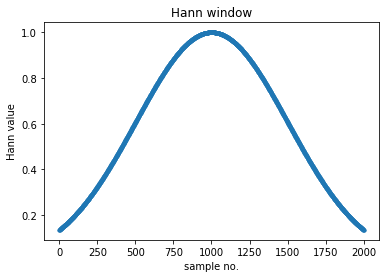

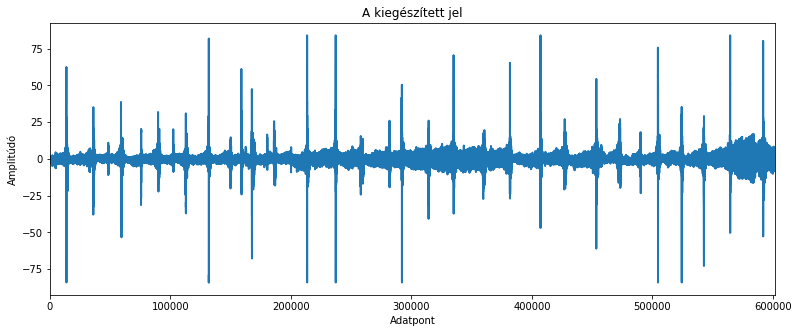

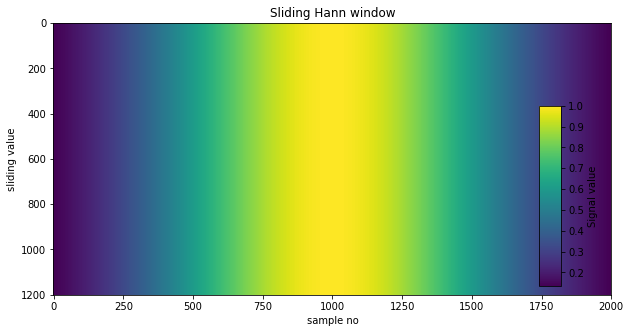

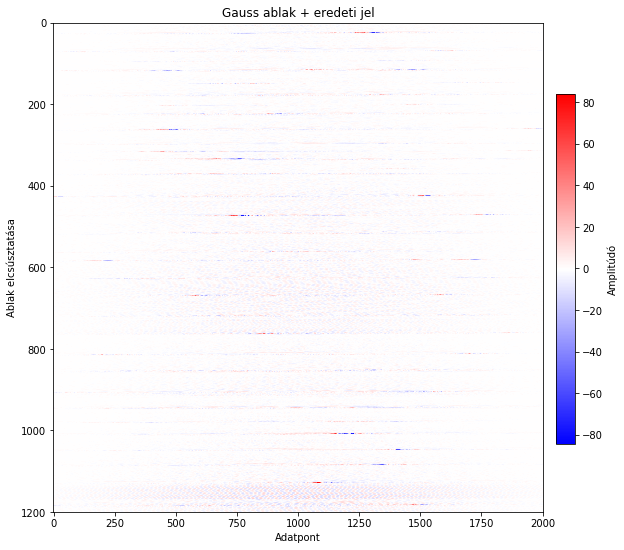

In [111]:
t0=time.time()
win_r = 1000 #1000
d_win=500#random.randint(200,300)
std=500 #150
win_base = scipy.signal.gaussian(2*win_r+1, std=std)#np.wining(2*win_r+1)

plt.plot(win_base,".-")
plt.title('Hann window')
plt.xlabel('sample no.')
plt.ylabel('Hann value')
#plt.show()

z_padded_s = np.zeros (samples+2*win_r)
z_0=z_padded_s
z_padded_s[win_r:-win_r] = s
z_padded_s[0:win_r]=np.average(z_padded_s[win_r+1:2*win_r])
z_padded_s[-win_r:]=np.average(z_padded_s[-2*win_r:-win_r-1])
x_win=np.linspace(0.0, t+(2*win_r/s_rate), samples+2*win_r)

plt.figure(figsize=(13,5))
plt.plot(z_padded_s,"-",linewidth = 2)#x_win,idő (s),max(x_win)
plt.xlim((0,samples+2*win_r))
plt.title('A kiegészített jel')
plt.xlabel('Adatpont')
plt.ylabel('Amplitúdó')
plt.savefig('sxr2_p.pdf')
#plt.show()

win = np.zeros((int(samples/d_win+1), 2*win_r+1))
for i in range(int(samples/d_win+1)):
    win [i]=win_base

plt.figure(figsize=(10,5))
plt.imshow(win,aspect='auto')
plt.title('Sliding Hann window')
plt.xlabel('sample no')
plt.ylabel('sliding value')
#plt.subplots_adjust(right=0.95)
cax = plt.axes([0.8, 0.15, 0.03, 0.5])
plt.colorbar(cax=cax).set_label('Signal value')
#plt.show()

z_win = np.zeros((int(samples/d_win+0.9), win_r*2+1))
for i in range(int(samples/d_win+0.9)):
    if i<1000001:
        z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1]-np.average(z_padded_s [d_win*i:d_win*i+win_r+win_r+1]))
    #z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1])

plt.figure(figsize=(9,9))
plt.imshow(z_win,aspect='auto',cmap='bwr')#, extent=(min_t*s_rate/d_win,max_t*s_rate/d_win,max_t*s_rate,min_t*s_rate)
plt.title('Gauss ablak + eredeti jel')
plt.xlabel('Adatpont')
plt.ylabel('Ablak elcsúsztatása')
plt.subplots_adjust(right=0.88)
cax = plt.axes([0.90, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig('z_win.pdf')
#plt.show()

z_win_fft = np.zeros((int(samples/d_win+0.9), win_r*2+1))
for i in range(int(samples/d_win+0.9)):
    if i % 1000 == 0:
        print('a')
    if i<1000001:
        z_win_fft[i] = np.abs(scipy.fftpack.fft(z_win[i]))  
t1=time.time()

print(z_win_fft.min()**2)
print(z_win_fft.max()**2)
print(std)

In [112]:
%%script false
print(win_base[0])
print(z_win[45])
plt.figure(figsize=(4,4))
plt.plot(z_win[1258], linewidth = 0.5)#l
plt.title('Gauss ablak+ eredeti je')
plt.xlabel('Adatpont')
plt.ylabel('Amplitúdó')
#plt.savefig('sxr2_1000.pdf')
plt.show()

Couldn't find program: 'false'


In [113]:
%%script false
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.plot_surface(z_win[:,0],z_win[:,1],z_win[:,2])
plt.show()

Couldn't find program: 'false'


In [114]:
%%script false
t2=time.time()
f_ax_stft, t_ax_stft, z_spy_stft = scipy.signal.stft(s,s_rate,window=win_base, nperseg=win_r*2+1, noverlap =win_r*2+1-d_win)
t3=time.time()
print(t1-t0)
print(t3-t2)

Couldn't find program: 'false'


In [115]:
%%script false
z_spy_stft=np.abs(z_spy_stft)**2
z_spy_stft_cutted = np.zeros((int(frangemax*(2*win_r+1)/s_rate),int(samples/d_win)))#int(frangemax*t+0.01)
for i in range(int(samples/d_win)):
    for j in range(int(frangemax*(2*win_r+1)/s_rate)):
        z_spy_stft_cutted [j][i] = z_spy_stft [j][i]

Couldn't find program: 'false'


In [116]:
z_win_fft_cutted = np.zeros((int(frangemax*(2*win_r+1)/s_rate), int(samples/d_win)))
for i in range(int(samples/d_win)):
    for j in range(int(frangemax*(2*win_r+1)/s_rate)): #int(frangemax*max(x_hann))
        z_win_fft_cutted [j][i] = z_win_fft [i][j]**2

        
print(z_win_fft.shape)
print(z_win_fft_cutted.shape)
#print(z_spy_stft.shape)
#print(z_spy_stft_cutted.shape)
#print(z_win_fft.max()/abs(z_spy_stft.max()))

(1200, 2001)
(1000, 1200)


In [117]:
%%script false
file2 = open("stft.txt","a")
for i in range(int(samples/d_win/37.5)):#
    for j in range(int(50000*(2*win_r+1)/s_rate)):
        j2=int(55000*(2*win_r+1)/s_rate)
        i2=int(samples/d_win/3+samples/d_win/30)
        file2.write(str(i/10)+"\t"+str(j/10)+"\t"+str(np.log10(z_spy_stft [j+j2][i*10+i2])+3)+"\n")#
print(i,j)

Couldn't find program: 'false'


In [118]:
%%script false
file2.close()

Couldn't find program: 'false'


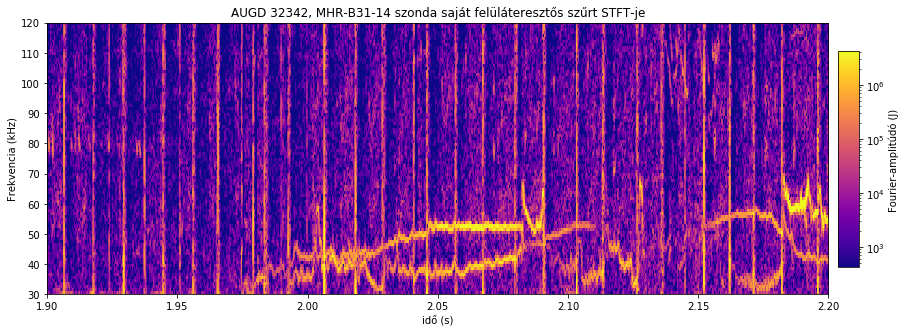

In [119]:
##### %%script false
colornorm=colors.LogNorm(vmin=z_win_fft_cutted.min()*40000000, vmax=z_win_fft_cutted.max()/10)
logax = np.linspace(int(np.log10(z_win_fft_cutted.min())),int(np.log10(z_win_fft_cutted.max())),int(np.log10(z_win_fft_cutted.max()))-int(np.log10(z_win_fft_cutted.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(14,5))
#extent=[0,t-(2*win_r/s_rate),0,frangemax/t],
#plt.figure(figsize=(15,10))
#ax.plot(x,np.abs(full_f),color='g',linewidth=3,linestyle='dashed',alpha=0.6)#img = ax.
img = plt.imshow(z_win_fft_cutted,cmap='plasma',  aspect='auto', extent=[min_t,max_t,frangemax/1000,0], norm=colornorm)#interpolation='gaussian',*30000000/4
#plt.title('39424-es kisülés, J051-es szonda STFT-je')
plt.title(shot+' szonda saját felüláteresztős szűrt STFT-je')
#plt.title('AUGD 34924, B31-40-es szonda STFT-je')
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')#('time (s)')
plt.ylim(120,30)
#plt.xlim(1.9,2.4)
plt.subplots_adjust(right=0.90)
plt.gca().invert_yaxis()
cbar=plt.colorbar(img,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier-amplitúdó (J)')
#plt.axis([2.13,2.15,min(s),20000])
#cbar.set_ticks(logax)
plt.savefig(shot+' stft.pdf')#34924_40
plt.show()

In [120]:
%%script false
logax = np.linspace(int(np.log10(z_spy_stft_cutted.min())),int(np.log10(z_spy_stft_cutted.max())),int(np.log10(z_spy_stft_cutted.max()))-int(np.log10(z_spy_stft_cutted.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(10,5))
#plt.figure(figsize=(15,10))
#plt.pcolormesh(f_ax, t_ax, np.abs(z_spy_stft), vmin=0, vmax=amp) # extent=[min_t,max_t,frangemax,0],
#ax.plot(x,np.abs(full_f),color='w',linewidth=3,linestyle='dashed')
plt.title('teszt jel szűretlen könyvtári STFT-je')
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')
#plt.ylim(140,0)
plt.subplots_adjust(right=0.90)
img2 = ax.imshow(np.abs(z_spy_stft_cutted),cmap='plasma', interpolation='gaussian', aspect='auto',extent=[min_t,max_t,frangemax/1000,0], norm=colors.LogNorm(vmin=z_spy_stft_cutted.min()*1, vmax=z_spy_stft_cutted.max()/2))#)*4000000/800
plt.gca().invert_yaxis() #extent=[min_t,max_t,frangemax,0],
cbar=plt.colorbar(img2,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier value')
#cbar.set_ticks(logax)
plt.savefig('t_stft1.pdf')
plt.show()

print(np.max(z_spy_stft))

Couldn't find program: 'false'


1200.0
1999999.3857142858
-1112347.8296685999
161.43002501790073


ValueError: x and y must have same first dimension, but have shapes (600000,) and (7000001,)

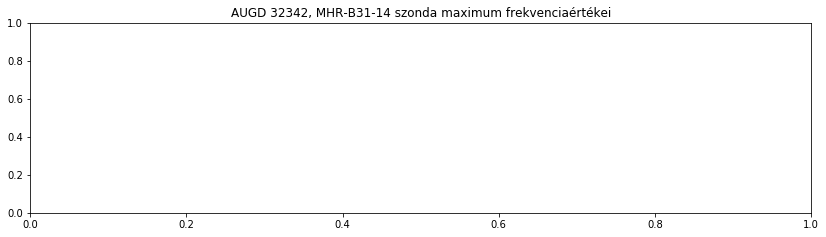

In [121]:
#%%script false
#ridge_no = 1
print(samples/d_win)

print(s_rate-0.9)
print(nyquist/((2*win_r+1)/s_rate-0.9))
ridge_d=20000#50#
ridge_d2=8000
ridge_start=40000#2#
ridge = np.zeros(int(samples/d_win+0.9))
ridge_h = np.zeros(int(samples/d_win+0.9))
maxi=z_win_fft.max()/40
print(maxi)

for i in range(int(samples/d_win+0.9)):
    ridgeval=0  #max(z_spy_stft[i][:])
    if (i==0) or (ridge[i-1]==0):
        for j in range(int(ridge_d*(2*win_r+1)/(s_rate-0.9))):
            j2=j+int((ridge_start)*(2*win_r+1)/(s_rate-0.9))
            if ridgeval < z_win_fft[i][j2]:
                ridgeval=z_win_fft[i][j2]
                ridge[i]= j2
    else:
        for j in range(int(ridge_d2*(2*win_r+1)/(s_rate-0.9))):
            j2=int(j+ridge[i-1]-(ridge_d2/2)*(2*win_r+1)/(s_rate-0.9))
            if ridgeval < z_win_fft[i][j2]:
                ridgeval=z_win_fft[i][j2]
                ridge[i]= j2
                #print(j2, z_spy_stft[j2][i])
    if ridgeval<(maxi):
        ridgeval =0
        ridge [i]=0
    ridge_h[i]=ridgeval**(1/2)
    #print(i, ridge [i])
    #print (i,"  ",ridge[i],"\t", ridgeval,"\t", z_spy_stft[i][int(ridge[i])])

ridge=ridge*(s_rate/(2*win_r+1))

#proc_x=np.linspace(min_t,max_t,np.size(ridge))
ridge[ ridge==0 ] = np.nan
plt.figure(figsize=(14,3.5))
plt.title(shot+' szonda maximum frekvenciaértékei')
plt.plot(np.linspace(min_t,max_t,np.size(ridge)),ridge/1000,'.-',x,full_f/1000)
plt.grid(True)
#plt.legend(('Kiszámolt', 'Eredeti'))
#yaxismax=1/2**(view.value/12)
plt.xlim(min_t,max_t)
plt.ylim(ridge_start/1100,)
#plt.ylim(0,200)
plt.xlim(0.89,0.91)
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')
plt.savefig(shot+' f_max.pdf')
plt.show()
#print(z_spy_stft.shape)
print(ridge.shape)

In [ ]:
%%script false
plt.figure(figsize=(14,3.5))
x_ridge=np.linspace(min_t,max_t,np.size(ridge))
diff_ridge=(f-60/((x_ridge/1.5)+1.8))*7-30-ridge#15+10*np.sin(np.pi*x_ridge)
plt.plot(x_ridge,abs(diff_ridge))#/ridge
plt.ylabel('Frekvencia (Hz)')
plt.xlabel('idő (s)')
plt.grid(True)
plt.xlim(min_t,max_t)
#plt.ylim(0,4)
plt.savefig('t_diff.pdf')
plt.show()
#((1/(np.size(ridge)-1))*sum((diff_ridge/ridge)**2))**(1/2)
np.average(abs(diff_ridge))

In [ ]:
logax = np.linspace(int(np.log10(z_win_fft_cutted.min())),int(np.log10(z_win_fft_cutted.max())),int(np.log10(z_win_fft_cutted.max()))-int(np.log10(z_win_fft_cutted.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(14,5))
#extent=[0,t-(2*win_r/s_rate),0,frangemax/t],
#plt.figure(figsize=(15,10))
ax.plot(np.linspace(min_t,max_t,np.size(ridge)),ridge/1000,'.',color='g',alpha=0.6)#,linewidth=3,linestyle='dashed')#img = ax.
img = plt.imshow(z_win_fft_cutted,cmap='plasma', interpolation='gaussian', aspect='auto', extent=[min_t,max_t,frangemax/1000,0], norm=colornorm)#
#plt.title('My Short-time Fourier transform')
plt.title(shot+'-es szonda STFT-je, adaptív maximumkereséssel')
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')#('time (s)')
#plt.xlim(0.652,0.66)
plt.ylim(90,40)
plt.subplots_adjust(right=0.90)
plt.gca().invert_yaxis()
cbar=plt.colorbar(img,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier-érték (J)')
#plt.axis([2.13,2.15,min(s),20000])
cbar.set_ticks(logax)
plt.savefig(shot+' stft_max.pdf')
plt.show()

In [ ]:
ridge_h[ ridge_h==0 ] = np.nan
print(maxi**(1/2))
plt.figure(figsize=(10,3.5))
plt.title('Az amplitúdó a maximum frekvenciaértékeknél, '+shot)#, AUGD 34924 J051-es szonda
plt.plot(np.linspace(min_t,max_t,np.size(ridge_h)),ridge_h,'-',markersize=1)#,x,3*abs(np.sin(2*np.pi*x))+2,
plt.grid(True)
plt.xlim(min_t,max_t)
#plt.xlim(0.89,0.91)
#plt.ylim(maxi**(1/2)/2,max(ridge_h)*1.05)
plt.ylabel('Amplitúdó')
plt.xlabel('idő (s)')
#plt.yscale("log")
plt.savefig(shot+'_amp.pdf')
plt.show()
print(z_spy_stft.shape)
print(ridge.shape)

amp_diff=np.zeros(int(samples/d_win+0.9))#
for i in range(int(samples/d_win+0.9)):
    amp_diff[i]=np.sqrt(ridge_h[i])-3*abs(np.sin(2*np.pi*x[20*i]))

## Small observations
Now, we make histograms of the noise and the entire signal. The difference - if the input is a single frequency - only one point. In general: it is the signal. We will fit a half gaussian onto these, and see, how likely it is, that the difference (signal) is produced by the noise.

In [ ]:
%%script false
hist_bins = np.linspace(0, 50000, 50)

"""plt.figure(figsize=(13,5))
plt.hist(yf_noise,hist_bins, density=True)
plt.title('Distribution of Fourier transformation (non-deterministic component)')
plt.ylabel('Frequency (%)')
plt.xlabel('Fourier amplitude')
plt.grid(True)
plt.show()"""

plt.figure(figsize=(13,5))
plt.hist(yfabs, hist_bins, density=True)
plt.title('Distribution of entire Fourier transformation')
plt.ylabel('Frequency (%)')
plt.xlabel('Fourier amplitude')
plt.yscale('log')
plt.grid(True)
plt.show()

In [ ]:
%%script false
plt.figure(figsize=(13,5))
plt.acorr(yfabs, maxlags=1400)
plt.axis([-1,1400,0,1])
#plt.xlim((0,frangemax))
plt.xlabel('$\Delta$ frequency (Hz)')
plt.ylabel('Autocorrelation value')
#plt.xscale('log')
plt.title('Autocorrelation of fourier value')
plt.grid(True)
plt.show()

def acf(x):
    result = np.correlate(x, x, mode='full')
    return result[int(result.size/2):]

s_acf=acf(s)
s_acf=s_acf/np.max(s_acf)
s_acf_fft_abs=abs(scipy.fftpack.fft(s))
s_acf_fft_ang=np.angle(scipy.fftpack.fft(s))/np.pi

plt.figure(figsize=(13,5))
plt.plot(x,s_acf)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim(min_t,max_t)
plt.xlabel('$\Delta$t (s)')
plt.ylabel('Autocorrelation value')
#plt.xscale('log')
plt.title('Autocorrelation of input signal')
plt.grid(True)
#plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,s_acf_fft_abs[:xf.size])
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title("Autocorrelation's Fourier-transform's amplitude")
plt.grid(True)
#plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,s_acf_fft_ang[:xf.size])
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title("Autocorrelation's Fourier-transform's phase")
plt.grid(True)
#plt.show()

We can see, that the ratio of the values of the Fourier transform of the deterministic and non-deterministic components of the input signal is practically a constant, and it is influenced by the relative amplitude of these components in the original signal. Is this a coincidence? [drawing](https://i.redd.it/nnlrafulz5701.jpg)

In [ ]:
%%script false
det_noise_fft_ratios = yfabs/np.abs(yf_noise[:xf.size]+yf_det[:xf.size])
print("Ratio of the ffts of deterministic and non-deterministic components:",'\naverage:',np.average(det_noise_fft_ratios))
print('Standard deviation:',np.std(det_noise_fft_ratios))
if 0<np.std(det_noise_fft_ratios)<0.001 :
    print("The deviation is practically zero.")

The next cell is used to evaluate how fast our stft is. If we got enough data (what we have) we can plot it.

In [ ]:
%%script false
for q in range(100):
    q2=np.log(q+1)**2.5
    print(q2*q, q2)

In [ ]:
%%script false
file = open("out.txt","a")
for q in range(10000):
    f=40
    #t=4
    #q2=np.log(10*q+15)**3.3
    samples=int(100000+21*q+random.randint(0,20))
    s_rate=1000
    t=samples/s_rate
    randamp=5
    nyquist=samples/2/t
    frangemax=nyquist

    xf=np.linspace(0.0, frangemax, int(frangemax*t+1))
    x = np.linspace(0.0, t, samples)
    full_f=np.linspace(f, f, samples) #   f/2+np.sin(2*np.pi*x)   f+x*0.01        (f-65/(x+1.1))
    full_f_phase = np.zeros(samples)
    for i in range (samples):
        full_f_phase[i]=np.sum(full_f[:i])/500
    
    amp=1#0.4+x/t*0.6

    s_det = amp*np.sin(full_f_phase*np.pi) #Changing freqency. old way: *(1+(x*10**2)**0.5)
    s_noise = (np.random.rand(samples)-0.5)*randamp
    s=(s_det+s_noise)/(0.5*randamp+1)
       
    t0=time.time()
    win_r = 120#5*q+3758+random.randint(0,4)#
    d_win=30#random.randint(200,300)
    hann_base = np.hanning(2*win_r+1)

    z_padded_s = np.linspace (0, 0, samples+2*win_r+1)
    z_0=z_padded_s
    z_padded_s[win_r:-win_r-1] = s
    x_hann=np.linspace(0.0, t+(2*win_r/s_rate), samples+2*win_r)

    win = np.zeros((int(samples/d_win+1), 2*win_r+1))
    for i in range(int(samples/d_win+1)):
        win [i]=hann_base
    
    #print(str(win_r*2+1)+"\t"+str(win.shape))
    
    z_win = np.zeros((int(samples/d_win+1), win_r*2+1))
    for i in range(int(samples/d_win+1)):
        z_win[i] = win[i] * z_padded_s [d_win*i:d_win*i+win_r+win_r+1]

    z_win_fft = np.zeros((int(samples/d_win+1), win_r*2+1))
    for i in range(int(samples/d_win+1)):
        z_win_fft[i] = np.abs(scipy.fftpack.fft(z_win[i]))  

    t1=time.time()
    
    t2=time.time()
    hann_big=np.zeros(samples)
    for i in range(2*win_r):
        hann_big[int(samples/2-win_r+i)] = hann_base[i]

    f_ax_stft, t_ax_stft, z_spy_stft = scipy.signal.stft(s,1000,window=hann_big, nperseg=samples, noverlap =samples-d_win)
    t3=time.time()
    
    if t1>t0 and t3>t2:
        file.write(str(t1-t0)+"\t"+str(t3-t2)+"\t"+str(samples)+"\t"+str((t1-t0)/(t3-t2))+"\n")
        print(str(q)+"\t"+ str(t1-t0)+"\t"+str(t3-t2)+"\t"+str(samples)+"\t"+str((t1-t0)/(t3-t2)))
file.close()

In [ ]:
%%script false
file.close()

In [ ]:
%%script false
dsamples = pd.read_excel("stft_speed.xlsx", 0)
dwin_r = pd.read_excel("stft_speed.xlsx", 1)
dd_win = pd.read_excel("stft_speed.xlsx", 2)
dsignaltype = pd.read_excel("stft_speed.xlsx", 3)
print (dsamples.tail())
print (dwin_r.head())
print (dd_win.head())
print (dsignaltype.shape)

In [ ]:
%%script false
plt.figure(figsize=(9,6))
plt.scatter(dsamples.samples,dsamples.ratio,s=1)
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Adatpontok száma')
plt.ylabel('STFT-k sebességaránya (Én/Scipy)')
plt.title('STFT-k sebességaránya változó számú adatpontnál')
plt.savefig('speed_4.pdf')
#plt.xlim(0,7000)
plt.show()

plt.figure(figsize=(9,4))
plt.plot(dwin_r.win_r,dwin_r.ratio,'.')
plt.grid()
plt.yscale("log")
plt.xlabel('Ablakszélesség')
plt.ylabel('STFT-k sebességaránya (Én/Scipy)')
plt.title('STFT-k sebességaránya az ablak szélességének változtatásánál')
#plt.xlim(0,6000)
plt.savefig('speed_0.pdf')
plt.show()

plt.figure(figsize=(13,10))
plt.plot(dd_win.d_win,dd_win.ratio,'.')
plt.grid()
#plt.yscale("log")
plt.xlabel('d_win')
plt.ylabel('My/Scipy speed ratio')
plt.title('Speed ratios of the STFTs when changing window distance')
plt.xlim(0,300)
plt.show()

plt.figure(figsize=(9,4))
plt.plot(dsignaltype.samples,dsignaltype.ratio,'.')
plt.grid()
plt.yscale("log")
plt.xlabel('Adatpontok száma')
plt.ylabel('STFT-k sebességaránya (Én/Scipy)')
plt.title('STFT-k sebességaránya változó konstans frekvencájú')
#plt.xlim(0,6000)
plt.savefig('speed_1.pdf')
plt.show()

In this cell, we create a plot for binding energies.

In [ ]:
%%script false
kotesi=pd.read_excel("kotesi.xlsx", 1)

plt.figure(figsize=(10,5))
plt.plot(kotesi.nuc,(-1)*kotesi.epn,'.-')
plt.grid()
plt.xscale("log")
plt.xlabel('Nukleonok száma')
plt.ylabel('My/Scipy speed ratio')
plt.title('Az egy nukleonra eső kötési energia')
plt.xlim(1,300)
plt.ylim(-10,0)
plt.show()

In [ ]:
%%script false
ch=np.loadtxt(open("output.txt", "rb"), delimiter=" ")
print(ch)
ch=ch.T

In [ ]:
%%script false
logax = np.linspace(int(np.log10(ch.min())),int(np.log10(ch.max())),int(np.log10(ch.max()))-int(np.log10(ch.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(14,5))
#extent=[0,t-(2*win_r/s_rate),0,frangemax/t],
#plt.figure(figsize=(15,10))
#ax.plot(np.linspace(min_t,max_t,np.size(ridge)),ridge/1000,'.',color='g',alpha=0.6)#,linewidth=3,linestyle='dashed')#img = ax.
img = plt.imshow(abs(ch),cmap='plasma', interpolation='gaussian', aspect='auto', extent=[0,1,4,0], norm=colors.LogNorm(vmin=ch.min()*1000000, vmax=ch.max()))#
#plt.title('My Short-time Fourier transform')
plt.title('Teszt jel')
plt.ylabel('Frekvencia (Hz)')
plt.xlabel('Idő (s)')#('time (s)')
#plt.xlim(0.652,0.66)
#plt.ylim(90,40)
plt.subplots_adjust(right=0.90)
plt.gca().invert_yaxis()
cbar=plt.colorbar(img,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Energiasűrűség (J/sHz)')
#plt.axis([0,1.15,min(s),20000])
cbar.set_ticks(logax)
plt.savefig('hffig_1.pdf')
plt.show()

## Tasks
<br> 
<br> Import and evaluate chirps
<br> Reconstruct wave frequencies and amplitudes
<br> Get the radial ?function of several wave types